<a href="https://colab.research.google.com/github/ShirCohen1/mmdetection/blob/master/dana_mmdetection_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 817.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.9.0+cu111 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but 

In [ ]:
from mmcv import collect_env
collect_env()

/usr/local/lib/python3.9/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


{'sys.platform': 'linux',
 'Python': '3.9.16 (main, Dec  7 2022, 01:11:51) [GCC 9.4.0]',
 'CUDA available': True,
 'GPU 0': 'Tesla T4',
 'CUDA_HOME': '/usr/local/cuda',
 'NVCC': 'Cuda compilation tools, release 11.8, V11.8.89',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,c

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.28.2
11.1
GCC 7.3


In [ ]:
import numpy as np
import json
import pprint

data/

└── cityscapes

    ├── annotations
    ├── gtFine
    │   ├── test
    │   ├── train
    │   └── val
    └── leftImg8bit
        ├── test
        ├── train
        └── val
main.py
inspect_coco.py
README.md
requirements.txt

# Download and Load Files


In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_320_273e_coco/yolov3_d53_320_273e_coco-421362b6.pth \
      -O checkpoints/yolov3_d53_320_273e_coco-421362b6.pth

--2023-04-05 11:54:04--  https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_320_273e_coco/yolov3_d53_320_273e_coco-421362b6.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.212, 8.48.85.209, 8.48.85.211, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248091419 (237M) [application/octet-stream]
Saving to: ‘checkpoints/yolov3_d53_320_273e_coco-421362b6.pth’

checkpoints/yolov3_ 100%[===================>] 236.60M  39.5MB/s    in 6.0s    

2023-04-05 11:54:11 (39.4 MB/s) - ‘checkpoints/yolov3_d53_320_273e_coco-421362b6.pth’ saved [248091419/248091419]



In [ ]:
# Copy pre separated data from drive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load existing annotation files
# To create new annotation files (not in drive) run in pycharm
!mkdir data/
!mkdir data/coco/
!mkdir data/coco/cityscapes

%cp -r -av "/content/gdrive/MyDrive/data/coco/annotations" "/content/mmdetection/data/coco/cityscapes"
%cp -r -av "/content/gdrive/MyDrive/data/aachen_000000_000019_leftImg8bit.png" "/content/mmdetection/demo"


'/content/gdrive/MyDrive/data/coco/annotations' -> '/content/mmdetection/data/coco/annotations'
'/content/gdrive/MyDrive/data/coco/annotations/instancesonly_filtered_gtFine_bochum.json' -> '/content/mmdetection/data/coco/annotations/instancesonly_filtered_gtFine_bochum.json'
'/content/gdrive/MyDrive/data/coco/annotations/instancesonly_filtered_gtFine_aachen.json' -> '/content/mmdetection/data/coco/annotations/instancesonly_filtered_gtFine_aachen.json'
'/content/gdrive/MyDrive/data/aachen_000000_000019_leftImg8bit.png' -> '/content/mmdetection/demo/aachen_000000_000019_leftImg8bit.png'


In [ ]:
# Load images for training
!mkdir data/coco/cityscapes/
!mkdir data/coco/cityscapes/leftImg8bit
%cp -r -av "/content/gdrive/MyDrive/data/coco/cityscapes/leftImg8bit" "/content/mmdetection/data/coco/cityscapes"


In [ ]:
# train annotation file
f = open('data/coco/cityscapes/annotations/instancesonly_filtered_gtFine_aachen.json')
train = json.load(f)

# check that annotation file has categories corresponding to model classes
train['categories']

[{'id': 0, 'name': 'person'},
 {'id': 1, 'name': 'bicycle'},
 {'id': 2, 'name': 'car'},
 {'id': 3, 'name': 'motorcycle'},
 {'id': 4, 'name': 'airplane'},
 {'id': 5, 'name': 'bus'},
 {'id': 6, 'name': 'train'},
 {'id': 7, 'name': 'truck'}]

# SKIP: Create sample annotation file for testing metrics

In [ ]:
#Create sample annotation file
sample_ann_file = {}
# to find image id for demo image

for img in train['images']:
  if img['file_name'] == 'leftImg8bit/aachen/aachen_000000_000019_leftImg8bit.png':
    print(img)
    # img.pop('id')
    # img['id'] = 0

    sample_ann_file['images'] = [img]
    sample_ann_file

anns = []
i = 0
for ann in train['annotations']:
  if ann['image_id'] == 89:
    # ann.pop('image_id')
    # ann['image_id'] = 0

    ann.pop('id')
    ann['id'] = i
    print(ann)
    i += 1
    anns.append(ann)
    
sample_ann_file['annotations'] = anns


sample_ann_file['categories'] = train['categories']   
# sample_ann_file['annotations'][:3]
sample_ann_file = json.dumps(sample_ann_file)
with open('sample_ann_aachen.json', 'w') as f:
        f.write(sample_ann_file)

sample_ann_file



{'id': 89, 'width': 2048, 'height': 1024, 'file_name': 'leftImg8bit/aachen/aachen_000000_000019_leftImg8bit.png', 'seg_file_name': 'aachen_000000_000019_gtFine_instanceIds.png'}
{'image_id': 89, 'category_id': 0, 'iscrowd': 0, 'area': 665, 'bbox': [892, 446, 21, 52], 'id': 0}
{'image_id': 89, 'category_id': 0, 'iscrowd': 0, 'area': 923, 'bbox': [901, 444, 34, 54], 'id': 1}
{'image_id': 89, 'category_id': 2, 'iscrowd': 0, 'area': 2129, 'bbox': [1966, 488, 77, 34], 'id': 2}
{'image_id': 89, 'category_id': 2, 'iscrowd': 0, 'area': 1636, 'bbox': [1512, 446, 149, 53], 'id': 3}
{'image_id': 89, 'category_id': 2, 'iscrowd': 0, 'area': 6072, 'bbox': [1479, 456, 156, 58], 'id': 4}
{'image_id': 89, 'category_id': 2, 'iscrowd': 0, 'area': 118, 'bbox': [1876, 482, 46, 5], 'id': 5}
{'image_id': 89, 'category_id': 2, 'iscrowd': 0, 'area': 1293, 'bbox': [1876, 486, 80, 27], 'id': 6}
{'image_id': 89, 'category_id': 2, 'iscrowd': 0, 'area': 5248, 'bbox': [1721, 450, 130, 59], 'id': 7}
{'image_id': 89, 

'{"images": [{"id": 89, "width": 2048, "height": 1024, "file_name": "leftImg8bit/aachen/aachen_000000_000019_leftImg8bit.png", "seg_file_name": "aachen_000000_000019_gtFine_instanceIds.png"}], "annotations": [{"image_id": 89, "category_id": 0, "iscrowd": 0, "area": 665, "bbox": [892, 446, 21, 52], "id": 0}, {"image_id": 89, "category_id": 0, "iscrowd": 0, "area": 923, "bbox": [901, 444, 34, 54], "id": 1}, {"image_id": 89, "category_id": 2, "iscrowd": 0, "area": 2129, "bbox": [1966, 488, 77, 34], "id": 2}, {"image_id": 89, "category_id": 2, "iscrowd": 0, "area": 1636, "bbox": [1512, 446, 149, 53], "id": 3}, {"image_id": 89, "category_id": 2, "iscrowd": 0, "area": 6072, "bbox": [1479, 456, 156, 58], "id": 4}, {"image_id": 89, "category_id": 2, "iscrowd": 0, "area": 118, "bbox": [1876, 482, 46, 5], "id": 5}, {"image_id": 89, "category_id": 2, "iscrowd": 0, "area": 1293, "bbox": [1876, 486, 80, 27], "id": 6}, {"image_id": 89, "category_id": 2, "iscrowd": 0, "area": 5248, "bbox": [1721, 450

# Load Pretrained Model

In [ ]:
import mmcv
from mmcv.runner import load_checkpoint
from mmdet.apis import inference_detector, show_result_pyplot, async_inference_detector
from mmdet.models import build_detector
import torch

# Choose to use a config and initialize the detector
#config = 'configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py'
config = 'configs/yolo/yolov3_d53_320_273e_coco.py'

# Setup a checkpoint file to load
#checkpoint = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'
checkpoint = 'checkpoints/yolov3_d53_320_273e_coco-421362b6.pth'
# checkpoint = '/content/mmdetection/tutorial_exps/latest.pth'

# Set the device to be used for evaluation
device=torch.device("cuda")

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)

print(model.CLASSES)
print(model)

load checkpoint from local path: checkpoints/yolov3_d53_320_273e_coco-421362b6.pth
('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
YOLOV3(
  (backbone): Darknet(
    (conv1): ConvModule(

In [ ]:
# check that keys are the same
coco_cityscapes_class_conv = {}
print('********* Cityscapes category mapping ********')
for j, categ in enumerate(train['categories']):
  if categ['name'] in model.CLASSES:
    print(categ)
    indx = model.CLASSES.index(categ['name'])
    coco_cityscapes_class_conv[indx] = j+1

relevant_classes = list(coco_cityscapes_class_conv.keys())

# key is index in model classes value is index in dataset classes
print('**** Mapping of model category id (key) to dataset category id (value) ****')
coco_cityscapes_class_conv
model.CLASSES[:8]

********* Cityscapes category mapping ********


TypeError: ignored

# Evaluate sample image on saved model

In [ ]:
## for running multiple images in eval with dataloader
# mmdet.apis.test.single_gpu_test(model,
                    # data_loader,
                    # show=False,
                    # out_dir=None,
                    # show_score_thr=0.3):

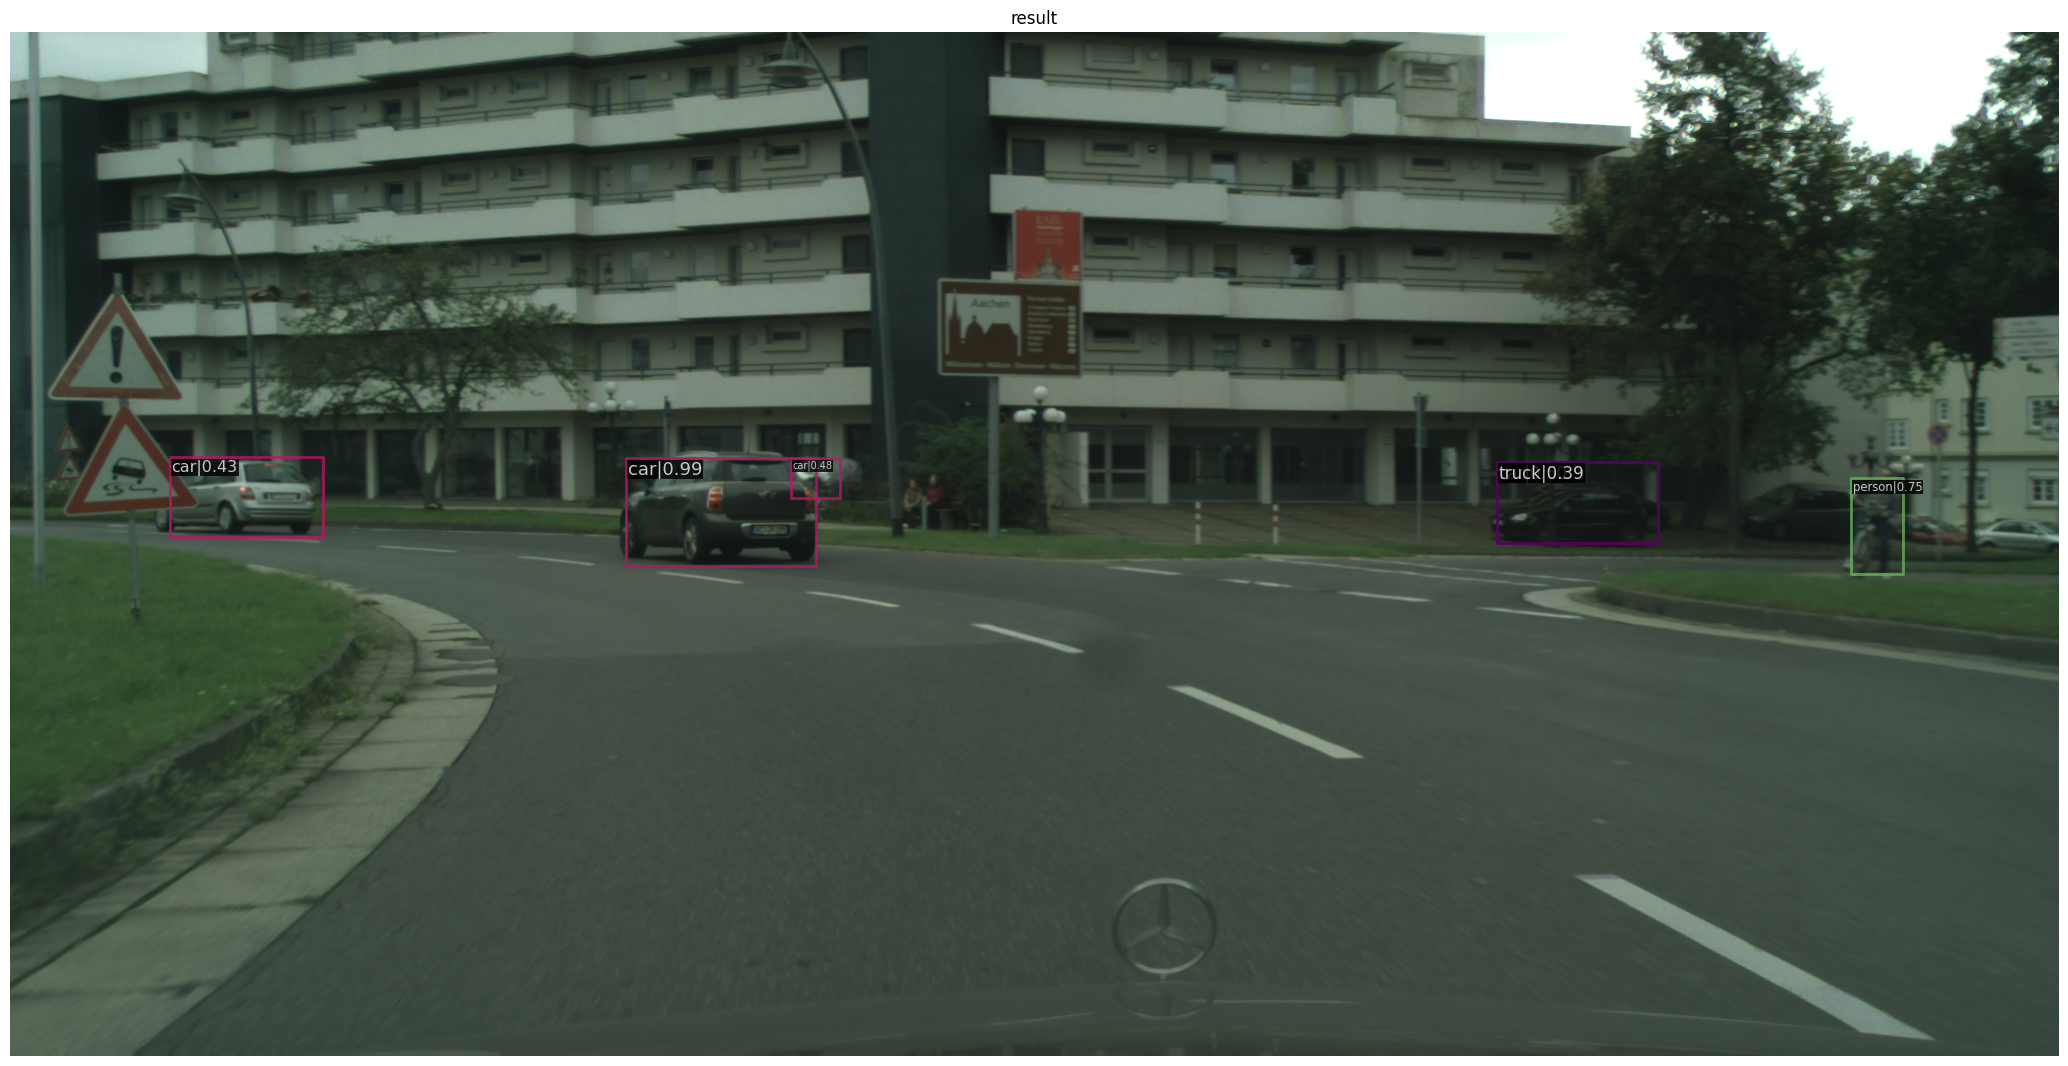

In [ ]:
# Convert the model into evaluation mode
model.eval()

img = 'demo/aachen_000000_000019_leftImg8bit.png'
result = inference_detector(model, img)

show_result_pyplot(model, img, result, score_thr=0.3)


In [ ]:
# # Run detector on multiple images - add all images to list
# img = 'demo/aachen_000000_000019_leftImg8bit.png'
# result_multi = inference_detector(model, [img, img])
# result_multi

# Format results for mmeval input



In [ ]:
def convert_result_format(result: list, classes: list) -> list:
  """Input is the YOLO model output, which is a list of 80 arrays. 
  Each array i is the result for class i.
  Converts to format for mmeval tool to add prediction
  Should return a list of dicts. Each image results in a new dict
  """

  bbox_result = result
  output = []

  # for multiple images add for loop here and change image_id each loop
  labels = []
  scores = []
  boxes = []
  for i, dict_per_label in enumerate(bbox_result):
    image_id = 89    #fixed image id for now - using aachen file from demo
    # Filter out bboxes that are predictions not from cityscapes classes
    if i in classes:
      label = [i]*dict_per_label.shape[0]
      labels.append(label)
      box = dict_per_label[:,:4]
      boxes.append(box)
      score = dict_per_label[:,-1]
      scores.append(score)

  labels = np.concatenate(labels)
  bboxes = np.vstack(boxes)
  scores = np.hstack(scores)

  data = dict()
  data['img_id'] = image_id
  data['bboxes'] = bboxes
  data['scores'] = scores
  data['labels'] = labels
  data['width'] = 2048
  data['height'] = 1024

  # fixed for now - make this dynamic
  data['file_name']=  "leftImg8bit/aachen/aachen_000000_000019_leftImg8bit.png",
  output.append(data)

  return output

bbox_json = convert_result_format(result, [0,1,2,3,4,5,6,7])

In [ ]:
# Results ready for mmeval input
bbox_json

[{'img_id': 89,
  'bboxes': array([[1840.7688 ,  446.6295 , 1892.6387 ,  542.54297],
         [ 893.7401 ,  439.78998,  931.4608 ,  503.5528 ],
         [ 912.85535,  438.3724 ,  942.4751 ,  499.41302],
         [ 418.4279 ,  423.32822,  442.4438 ,  480.49854],
         [1888.6113 ,  471.62396, 1933.6683 ,  514.494  ],
         [1863.8467 ,  425.02133, 1890.0896 ,  466.648  ],
         [2024.5049 ,  432.38306, 2040.6127 ,  464.7024 ],
         [ 155.82333,  434.19342,  190.03963,  464.74966],
         [1951.3694 ,  477.27377, 2019.6057 ,  513.1537 ],
         [1839.1019 ,  488.28824, 1883.3059 ,  547.74927],
         [ 893.7401 ,  439.78998,  931.4608 ,  503.5528 ],
         [1888.6113 ,  471.62396, 1933.6683 ,  514.494  ],
         [ 413.75473,  449.93256,  438.33795,  484.92133],
         [ 912.85535,  438.3724 ,  942.4751 ,  499.41302],
         [1752.4261 ,  441.3571 , 1968.7317 ,  526.25397],
         [ 615.1175 ,  426.8705 ,  805.8624 ,  534.83075],
         [1486.2103 ,  430.213

# Evaluation

In [ ]:
!pip install mmeval
!pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 KB 5.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from mmeval import COCODetection

try:
  from mmeval.metrics.utils.coco_wrapper import mask_util
except ImportError as e:
  mask_util = None

In [ ]:
import contextlib
import datetime
import io
import itertools
import numpy as np
import os.path as osp
import tempfile
import warnings
import logging
from collections import OrderedDict
from json import dump
from rich.console import Console
from rich.table import Table
from typing import Dict, List, Optional, Sequence, Union

from mmeval.core.base_metric import BaseMetric
from mmeval.fileio import get_local_path, load
from mmeval.utils import is_list_of

try:
    from mmeval.metrics.utils.coco_wrapper import COCO, COCOeval
    HAS_COCOAPI = True
except ImportError:
    HAS_COCOAPI = False



class COCODetection(BaseMetric):
    """COCO object detection task evaluation metric.
    Evaluate AR, AP, and mAP for detection tasks including proposal/box
    detection and instance segmentation. Please refer to
    https://cocodataset.org/#detection-eval for more details.
    Args:
        ann_file (str, optional): Path to the coco format annotation file.
            If not specified, ground truth annotations from the dataset will
            be converted to coco format. Defaults to None.
        metric (str | List[str]): Metrics to be evaluated. Valid metrics
            include 'bbox', 'segm', and 'proposal'. Defaults to 'bbox'.
        iou_thrs (float | List[float], optional): IoU threshold to compute AP
            and AR. If not specified, IoUs from 0.5 to 0.95 will be used.
            Defaults to None.
        classwise (bool): Whether to return the computed  results of each
            class. Defaults to False.
        proposal_nums (Sequence[int]): Numbers of proposals to be evaluated.
            Defaults to (1, 10, 100).
        metric_items (List[str], optional): Metric result names to be
            recorded in the evaluation result. Defaults to None.
        format_only (bool): Format the output results without perform
            evaluation. It is useful when you want to format the result
            to a specific format and submit it to the test server.
            Defaults to False.
        outfile_prefix (str, optional): The prefix of json files. It includes
            the file path and the prefix of filename, e.g., "a/b/prefix".
            If not specified, a temp file will be created. Defaults to None.
        gt_mask_area (bool): Whether to calculate GT mask area when not
            loading ann_file. If True, the GT instance area will be the mask
            area, else the bounding box area. It will not be used when loading
            ann_file. Defaults to True.
        backend_args (dict, optional): Arguments to instantiate the
            preifx of uri corresponding backend. Defaults to None.
        print_results (bool): Whether to print the results. Defaults to True.
        logger (Logger, optional): logger used to record messages. When set to
            ``None``, the default logger will be used.
            Defaults to None.
        **kwargs: Keyword parameters passed to :class:`BaseMetric`.
    Examples:
        >>> import numpy as np
        >>> from mmeval import COCODetection
        >>> try:
        >>>     from mmeval.metrics.utils.coco_wrapper import mask_util
        >>> except ImportError as e:
        >>>     mask_util = None
        >>>
        >>> num_classes = 4
        >>> fake_dataset_metas = {
        ...     'classes': tuple([str(i) for i in range(num_classes)])
        ... }
        >>>
        >>> coco_det_metric = COCODetection(
        ...     dataset_meta=fake_dataset_metas,
        ...     metric=['bbox', 'segm']
        ... )
        >>> def _gen_bboxes(num_bboxes, img_w=256, img_h=256):
        ...     # random generate bounding boxes in 'xyxy' formart.
        ...     x = np.random.rand(num_bboxes, ) * img_w
        ...     y = np.random.rand(num_bboxes, ) * img_h
        ...     w = np.random.rand(num_bboxes, ) * (img_w - x)
        ...     h = np.random.rand(num_bboxes, ) * (img_h - y)
        ...     return np.stack([x, y, x + w, y + h], axis=1)
        >>>
        >>> def _gen_masks(bboxes, img_w=256, img_h=256):
        ...     if mask_util is None:
        ...         raise ImportError(
        ...             'Please try to install official pycocotools by '
        ...             '"pip install pycocotools"')
        ...     masks = []
        ...     for i, bbox in enumerate(bboxes):
        ...         mask = np.zeros((img_h, img_w))
        ...         bbox = bbox.astype(np.int32)
        ...         box_mask = (np.random.rand(
        ...             bbox[3] - bbox[1],
        ...             bbox[2] - bbox[0]) > 0.3).astype(np.int32)
        ...         mask[bbox[1]:bbox[3], bbox[0]:bbox[2]] = box_mask
        ...         masks.append(
        ...             mask_util.encode(
        ...                 np.array(mask[:, :, np.newaxis], order='F',
        ...                          dtype='uint8'))[0])  # encoded with RLE
        ...     return masks
        >>>
        >>> img_id = 1
        >>> img_w, img_h = 256, 256
        >>> num_bboxes = 10
        >>> pred_boxes = _gen_bboxes(
        ...     num_bboxes=num_bboxes,
        ...     img_w=img_w,
        ...     img_h=img_h)
        >>> pred_masks = _gen_masks(
        ...     bboxes=pred_boxes,
        ...     img_w=img_w,
        ...     img_h=img_h)
        >>> prediction = {
        ...     'img_id': img_id,
        ...     'bboxes': pred_boxes,
        ...     'scores': np.random.rand(num_bboxes, ),
        ...     'labels': np.random.randint(0, num_classes, size=(num_bboxes, )),
        ...     'masks': pred_masks
        ... }
        >>> gt_boxes = _gen_bboxes(
        ...     num_bboxes=num_bboxes,
        ...     img_w=img_w,
        ...     img_h=img_h)
        >>> gt_masks = _gen_masks(
        ...     bboxes=pred_boxes,
        ...     img_w=img_w,
        ...     img_h=img_h)
        >>> groundtruth = {
        ...     'img_id': img_id,
        ...     'width': img_w,
        ...     'height': img_h,
        ...     'bboxes': gt_boxes,
        ...     'labels': np.random.randint(0, num_classes, size=(num_bboxes, )),
        ...     'masks': gt_masks,
        ...     'ignore_flags': np.zeros(num_bboxes)
        ... }
        >>> coco_det_metric(predictions=[prediction, ], groundtruths=[groundtruth, ])  # doctest: +ELLIPSIS  # noqa: E501
        {'bbox_mAP': ..., 'bbox_mAP_50': ..., ...,
         'segm_mAP': ..., 'segm_mAP_50': ..., ...,
         'bbox_result': ..., 'segm_result': ..., ...}
    """
    _classes = model.CLASSES


    def __init__(self,
                 ann_file: Optional[str] = None,
                 metric: Union[str, List[str]] = 'bbox',
                 iou_thrs: Union[float, Sequence[float], None] = None,
                 classwise: bool = False,
                 proposal_nums: Sequence[int] = (1, 10, 100),
                 metric_items: Optional[Sequence[str]] = None,
                 format_only: bool = False,
                 outfile_prefix: Optional[str] = None,
                 gt_mask_area: bool = True,
                 backend_args: Optional[dict] = None,
                 print_results: bool = True,
                 **kwargs) -> None:
        if not HAS_COCOAPI:
            raise RuntimeError('Failed to import `COCO` and `COCOeval` from '
                               '`mmeval.utils.coco_wrapper`. '
                               'Please try to install official pycocotools by '
                               '"pip install pycocotools"')
        super().__init__(**kwargs)
        self.logger = logging.getLogger(__name__)

        # coco evaluation metrics
        self.metrics = metric if isinstance(metric, list) else [metric]
        allowed_metrics = ['bbox', 'segm', 'proposal']
        for metric in self.metrics:
            if metric not in allowed_metrics:
                raise KeyError(
                    "metric should be one of 'bbox', 'segm', and 'proposal', "
                    f'but got {metric}.')

        # do class wise evaluation, default False
        self.classwise = classwise

        # proposal_nums used to compute recall or precision.
        self.proposal_nums = list(proposal_nums)

        # iou_thrs used to compute recall or precision.
        if iou_thrs is None:
            iou_thrs = np.linspace(
                .5, 0.95, int(np.round((0.95 - .5) / .05)) + 1, endpoint=True)
        elif isinstance(iou_thrs, float):
            iou_thrs = np.array([iou_thrs])
        elif is_list_of(iou_thrs, float):
            iou_thrs = np.array(iou_thrs)
        else:
            raise TypeError(
                '`iou_thrs` should be None, float, or a list of float')

        self.iou_thrs = iou_thrs
        self.metric_items = metric_items
        self.print_results = print_results
        self.format_only = format_only
        if self.format_only:
            assert outfile_prefix is not None, 'outfile_prefix must be not'
            'None when format_only is True, otherwise the result files will'
            'be saved to a temp directory which will be cleaned up at the end.'

        self.outfile_prefix = outfile_prefix

        # if ann_file is not specified,
        # initialize coco api with the converted dataset
        self._coco_api: Optional[COCO]  # type: ignore
        if ann_file is not None:
            with get_local_path(
                    filepath=ann_file,
                    backend_args=backend_args) as local_path:
                self._coco_api = COCO(annotation_file=local_path)
                print(f'Annotation file has {len(self._coco_api.getImgIds())} images')
                print(f'Annotation file has {len(self._coco_api.getAnnIds())} labels')
            
        else:
            self._coco_api = None

        self.gt_mask_area = gt_mask_area
        # handle dataset lazy init
        self.cat_ids: list = []
        self.img_ids: list = []

    def xyxy2xywh(self, bbox: np.ndarray) -> list:
        """Convert ``xyxy`` style bounding boxes to ``xywh`` style for COCO
        evaluation.
        Args:
            bbox (np.ndarray): The bounding boxes, shape (4, ), in
                ``xyxy`` order.
        Returns:
            list[float]: The converted bounding boxes, in ``xywh`` order.
        """

        _bbox: List = bbox.tolist()
        return [
            _bbox[0],
            _bbox[1],
            _bbox[2] - _bbox[0],
            _bbox[3] - _bbox[1],
        ]

    def results2json(self, results: Sequence[dict],
                     outfile_prefix: str) -> dict:
        """Dump the detection results to a COCO style json file.
        There are 3 types of results: proposals, bbox predictions, mask
        predictions, and they have different data types. This method will
        automatically recognize the type, and dump them to json files.
        Args:
            results (Sequence[dict]): Testing results of the
                dataset.
            outfile_prefix (str): The filename prefix of the json files. If the
                prefix is "somepath/xxx", the json files will be named
                "somepath/xxx.bbox.json", "somepath/xxx.segm.json",
                "somepath/xxx.proposal.json".
        Returns:
            dict: Possible keys are "bbox", "segm", "proposal", and
            values are corresponding filenames.
        """
        bbox_json_results = []
        segm_json_results: Optional[
            list] = [] if 'masks' in results[0] else None
        for idx, result in enumerate(results):
            image_id = result.get('img_id', idx)
            labels = result['labels']
            bboxes = result['bboxes']
            scores = result['scores']
            # bbox results
            for i, label in enumerate(labels):
                data = dict()
                data['image_id'] = image_id
                data['bbox'] = self.xyxy2xywh(bboxes[i])
                data['score'] = float(scores[i])
                # Convert model label id to cityscapes label id
                
                # print(f'Value is {coco_cityscapes_class_conv[label]}')
                data['category_id'] = self.cat_ids[int(label)]
                bbox_json_results.append(data)

            if segm_json_results is None:
                continue

            # segm results
            masks = result['masks']
            mask_scores = result.get('mask_scores', scores)
            for i, label in enumerate(labels):
                data = dict()
                data['image_id'] = image_id
                data['bbox'] = self.xyxy2xywh(bboxes[i])
                data['score'] = float(mask_scores[i])
                data['category_id'] = self.cat_ids[int(label)]
                if isinstance(masks[i]['counts'], bytes):
                    masks[i]['counts'] = masks[i]['counts'].decode()
                data['segmentation'] = masks[i]
                segm_json_results.append(data)

        result_files = dict()
        result_files['bbox'] = f'{outfile_prefix}.bbox.json'
        result_files['proposal'] = f'{outfile_prefix}.bbox.json'
        with open(result_files['bbox'], 'w') as f:
            dump(bbox_json_results, f)

        if segm_json_results is not None:
            result_files['segm'] = f'{outfile_prefix}.segm.json'
            with open(result_files['segm'], 'w') as f:
                dump(segm_json_results, f)

        return result_files

    def gt_to_coco_json(self, gt_dicts: Sequence[dict],
                        outfile_prefix: str) -> str:
        """Convert ground truth to coco format json file.
        Args:
            gt_dicts (Sequence[dict]): Ground truth of the dataset.
            outfile_prefix (str): The filename prefix of the json files. If the
                prefix is "somepath/xxx", the json file will be named
                "somepath/xxx.gt.json".
        Returns:
            str: The filename of the json file.
        """
        try:
            from mmeval.metrics.utils.coco_wrapper import mask_util
        except ImportError:
            mask_util = None

        warnings.warn(
            'The area of the instance is default to use bbox area. '
            'Compared to load annotation file evaluate way, this will '
            'not affect the overall AP, but leads to different '
            'small/medium/large AP results.')

        classes = self.classes
        categories = [
            dict(id=id, name=name) for id, name in enumerate(classes)
        ]
        image_infos: list = []
        annotations: list = []

        for idx, gt_dict in enumerate(gt_dicts):
            img_id = gt_dict.get('img_id', idx)
            image_info = dict(
                id=img_id,
                width=gt_dict['width'],
                height=gt_dict['height'],
                file_name='')
            image_infos.append(image_info)
            gt_bboxes = gt_dict['bboxes']
            gt_labels = gt_dict['labels']
            assert len(gt_bboxes) == len(gt_labels)
            if 'ignore_flags' in gt_dict:
                ignore_flags = gt_dict['ignore_flags']
                assert len(gt_bboxes) == len(ignore_flags)
            else:
                ignore_flags = np.zeros(len(gt_bboxes))
            if 'masks' in gt_dict:
                gt_masks = gt_dict['masks']
                assert len(gt_masks) == len(gt_bboxes)
            else:
                gt_masks = [None for _ in range(len(gt_bboxes))]

            for i in range(len(gt_bboxes)):
                label = gt_labels[i]
                coco_bbox = self.xyxy2xywh(gt_bboxes[i])
                ignore_flag = ignore_flags[i]
                mask = gt_masks[i]
                annotation = dict(
                    id=len(annotations) +
                    1,  # coco api requires id starts with 1
                    image_id=img_id,
                    bbox=coco_bbox,
                    iscrowd=int(ignore_flag),
                    category_id=int(label),
                    area=coco_bbox[2] * coco_bbox[3])
                if mask is not None:
                    if mask_util and self.gt_mask_area:
                        # Using mask area can reduce the gap of
                        # small/medium/large AP results.
                        area = mask_util.area(mask)
                        annotation['area'] = float(area)
                    if isinstance(mask, dict) and isinstance(
                            mask['counts'], bytes):
                        mask['counts'] = mask['counts'].decode()
                    annotation['segmentation'] = mask
                annotations.append(annotation)

        info = dict(
            date_created=str(datetime.datetime.now()),
            description='Coco json file converted by mmeval CocoMetric.')
        coco_json = dict(
            info=info,
            images=image_infos,
            categories=categories,
            licenses=None,
        )
        if len(annotations) > 0:
            coco_json['annotations'] = annotations
        converted_json_path = f'{outfile_prefix}.gt.json'
        with open(converted_json_path, 'w') as f:
            dump(coco_json, f)
        return converted_json_path

    def add(self, predictions: Sequence[Dict], groundtruths: Sequence[Dict]) -> None:  # type: ignore # yapf: disable # noqa: E501
        """Add the intermediate results to `self._results`.
        Args:
            predictions (Sequence[dict]): A sequence of dict. Each dict
                representing a detection result for an image, with the
                following keys:
                - img_id (int): Image id.
                - bboxes (numpy.ndarray): Shape (N, 4), the predicted
                  bounding bboxes of this image, in 'xyxy' foramrt.
                - scores (numpy.ndarray): Shape (N, ), the predicted scores
                  of bounding boxes.
                - labels (numpy.ndarray): Shape (N, ), the predicted labels
                  of bounding boxes.
                - masks (list[RLE], optional): The predicted masks.
                - mask_scores (np.array, optional): Shape (N, ), the predicted
                  scores of masks.
            groundtruths (Sequence[dict]): A sequence of dict. If load from
                `ann_file`, the dict inside can be empty. Else, each dict
                represents a groundtruths for an image, with the following
                keys:
                - img_id (int): Image id.
                - width (int): The width of the image.
                - height (int): The height of the image.
                - bboxes (numpy.ndarray): Shape (K, 4), the ground truth
                  bounding bboxes of this image, in 'xyxy' foramrt.
                - labels (numpy.ndarray): Shape (K, ), the ground truth
                  labels of bounding boxes.
                - masks (list[RLE], optional): The predicted masks.
                - ignore_flags (numpy.ndarray, optional): Shape (K, ),
                  the ignore flags.
        """
        for prediction, groundtruth in zip(predictions, groundtruths):
            assert isinstance(prediction, dict), 'The prediciton should be ' \
                f'a sequence of dict, but got a sequence of {type(prediction)}.'  # noqa: E501
            assert isinstance(groundtruth, dict), 'The label should be ' \
                f'a sequence of dict, but got a sequence of {type(groundtruth)}.'   # noqa: E501
            self._results.append((prediction, groundtruth))

    def add_predictions(self, predictions: Sequence[Dict]) -> None:
        """Add predictions only.
        If the `ann_file` has been passed, we can add predictions only.
        Args:
            predictions (Sequence[dict]): Refer to
                :class:`COCODetection.add`.
        """
        assert self._coco_api is not None, 'The `ann_file` should be ' \
            'passesd when use the `COCODetection.add_predictions` ' \
            'method, otherwisw use the `COCODetection.add` instead!'
        self.add(predictions, groundtruths=[{}] * len(predictions))

    def __call__(self, *args, **kwargs) -> Dict:
        """Stateless call for a metric compute."""

        # cache states
        cache_results = self._results
        cache_coco_api = self._coco_api
        cache_cat_ids = self.cat_ids
        cache_img_ids = self.img_ids

        self._results = []
        self.add(*args, **kwargs)
        metric_result = self.compute_metric(self._results)

        # recover states from cache
        self._results = cache_results
        self._coco_api = cache_coco_api
        self.cat_ids = cache_cat_ids
        self.img_ids = cache_img_ids

        return metric_result

    def compute_metric(self, results: list) -> dict:
        """Compute the COCO metrics.
        Args:
            results (List[tuple]): A list of tuple. Each tuple is the
                prediction and ground truth of an image. This list has already
                been synced across all ranks.
        Returns:
            dict: The computed metric.
            The keys are the names of the metrics, and the values are
            corresponding results.
        """
        tmp_dir = None
        if self.outfile_prefix is None:
            tmp_dir = tempfile.TemporaryDirectory()
            outfile_prefix = osp.join(tmp_dir.name, 'results')
        else:
            outfile_prefix = self.outfile_prefix

        classes = self.classes
        # split gt and prediction list
        preds, gts = zip(*results)

        if self._coco_api is None:
            # use converted gt json file to initialize coco api
            self.logger.info('Converting ground truth to coco format...')
            coco_json_path = self.gt_to_coco_json(
                gt_dicts=gts, outfile_prefix=outfile_prefix)
            self._coco_api = COCO(coco_json_path)

        # handle lazy init
        if len(self.cat_ids) == 0:
            self.cat_ids = self._coco_api.get_cat_ids(
                cat_names=classes)  # type: ignore
        if len(self.img_ids) == 0:
            self.img_ids = self._coco_api.get_img_ids()

        # convert predictions to coco format and dump to json file
        result_files = self.results2json(preds, outfile_prefix)

        eval_results: OrderedDict = OrderedDict()
        table_results: OrderedDict = OrderedDict()
        if self.format_only:
            self.logger.info(
                f'Results are saved in {osp.dirname(outfile_prefix)}')
            return eval_results

        for metric in self.metrics:
            self.logger.info(f'Evaluating {metric}...')
            print(f'Evaluating {metric}...')
            # evaluate proposal, bbox and segm
            iou_type = 'bbox' if metric == 'proposal' else metric
            if metric not in result_files:
                raise KeyError(f'{metric} is not in results')
            try:
                predictions = load(result_files[metric])
                if iou_type == 'segm':
                    # Refer to https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py#L331  # noqa
                    # When evaluating mask AP, if the results contain bbox,
                    # cocoapi will use the box area instead of the mask area
                    # for calculating the instance area. Though the overall AP
                    # is not affected, this leads to different
                    # small/medium/large mask AP results.
                    for x in predictions:
                        x.pop('bbox')
                coco_dt = self._coco_api.loadRes(predictions)

            except IndexError:
                self.logger.warning('The testing results of the '
                                    'whole dataset is empty.')
                break

            coco_eval = COCOeval(self._coco_api, coco_dt, iou_type)

            coco_eval.params.catIds = self.cat_ids
            coco_eval.params.imgIds = self.img_ids
            coco_eval.params.maxDets = self.proposal_nums
            coco_eval.params.iouThrs = self.iou_thrs

            # mapping of cocoEval.stats
            coco_metric_names = {
                'mAP': 0,
                'mAP_50': 1,
                'mAP_75': 2,
                'mAP_s': 3,
                'mAP_m': 4,
                'mAP_l': 5,
                f'AR@{self.proposal_nums[0]}': 6,
                f'AR@{self.proposal_nums[1]}': 7,
                f'AR@{self.proposal_nums[2]}': 8,
                f'AR_s@{self.proposal_nums[2]}': 9,
                f'AR_m@{self.proposal_nums[2]}': 10,
                f'AR_l@{self.proposal_nums[2]}': 11
            }
            metric_items = self.metric_items
            if metric_items is not None:
                for metric_item in metric_items:
                    if metric_item not in coco_metric_names:
                        raise KeyError(
                            f'metric item "{metric_item}" is not supported')

            if metric == 'proposal':
                coco_eval.params.useCats = 0


                # evaluate 

                coco_eval.evaluate()
                coco_eval.accumulate()
                redirect_string = io.StringIO()
                with contextlib.redirect_stdout(redirect_string):
                    coco_eval.summarize()
                self.logger.info('\n' + redirect_string.getvalue())
                if metric_items is None:
                    metric_items = [
                        f'AR@{self.proposal_nums[0]}',
                        f'AR@{self.proposal_nums[1]}',
                        f'AR@{self.proposal_nums[2]}',
                        f'AR_s@{self.proposal_nums[2]}',
                        f'AR_m@{self.proposal_nums[2]}',
                        f'AR_l@{self.proposal_nums[2]}'
                    ]

                results_list = []
                for item in metric_items:
                    val = float(coco_eval.stats[coco_metric_names[item]])
                    results_list.append(f'{round(val * 100, 2):0.2f}')
                    eval_results[item] = val
                table_results[f'{metric}_result'] = results_list
            else:
                coco_eval.evaluate()
                coco_eval.accumulate()
                # Save coco summarize print information to logger
                redirect_string = io.StringIO()
                with contextlib.redirect_stdout(redirect_string):
                    coco_eval.summarize()
                self.logger.info('\n' + redirect_string.getvalue())
                if metric_items is None:
                    metric_items = [
                        'mAP', 'mAP_50', 'mAP_75', 'mAP_s', 'mAP_m', 'mAP_l'
                    ]

                results_list = []
                for metric_item in metric_items:
                    key = f'{metric}_{metric_item}'
                    val = coco_eval.stats[coco_metric_names[metric_item]]
                    results_list.append(f'{round(val * 100, 2):0.2f}')
                    eval_results[key] = float(val)
                table_results[f'{metric}_result'] = results_list

                if self.classwise:  # Compute per-category AP
                    # Compute per-category AP
                    # from https://github.com/facebookresearch/detectron2/
                    precisions = coco_eval.eval['precision']
                    # precision: (iou, recall, cls, area range, max dets)
                    assert len(self.cat_ids) == precisions.shape[2]

                    results_per_category = []
                    for idx, cat_id in enumerate(self.cat_ids):
                        # area range index 0: all area ranges
                        # max dets index -1: typically 100 per image
                        nm = self._coco_api.loadCats(cat_id)[0]
                        precision = precisions[:, :, idx, 0, -1]
                        precision = precision[precision > -1]
                        if precision.size:
                            ap = np.mean(precision)
                        else:
                            ap = float('nan')
                        results_per_category.append(
                            (f'{nm["name"]}', f'{round(ap * 100, 2):0.2f}'))
                        eval_results[f'{metric}_{nm["name"]}_precision'] = ap

                    table_results[f'{metric}_classwise_result'] = \
                        results_per_category
        if tmp_dir is not None:
            tmp_dir.cleanup()
        # if the testing results of the whole dataset is empty,
        # does not print tables.
        if self.print_results and len(table_results) > 0:
            self._print_results(table_results)
        return eval_results

    def _print_results(self, table_results: dict) -> None:
        """Print the evaluation results table.
        Args:
            table_results (dict): The computed metric.
        """
        for metric in self.metrics:
            result = table_results[f'{metric}_result']

            if metric == 'proposal':
                table_title = ' Recall Results (%)'
                if self.metric_items is None:
                    assert len(result) == 6
                    headers = [
                        f'AR@{self.proposal_nums[0]}',
                        f'AR@{self.proposal_nums[1]}',
                        f'AR@{self.proposal_nums[2]}',
                        f'AR_s@{self.proposal_nums[2]}',
                        f'AR_m@{self.proposal_nums[2]}',
                        f'AR_l@{self.proposal_nums[2]}'
                    ]
                else:
                    assert len(result) == len(self.metric_items)  # type: ignore # yapf: disable # noqa: E501
                    headers = self.metric_items  # type: ignore
            else:
                table_title = f' {metric} Results (%)'
                if self.metric_items is None:
                    assert len(result) == 6
                    headers = [
                        f'{metric}_mAP', f'{metric}_mAP_50',
                        f'{metric}_mAP_75', f'{metric}_mAP_s',
                        f'{metric}_mAP_m', f'{metric}_mAP_l'
                    ]
                else:
                    assert len(result) == len(self.metric_items)
                    headers = [
                        f'{metric}_{item}' for item in self.metric_items
                    ]
            table = Table(title=table_title)
            console = Console()
            for name in headers:
                table.add_column(name, justify='left')
            table.add_row(*result)
            with console.capture() as capture:
                console.print(table, end='')
            self.logger.info('\n' + capture.get())

            if self.classwise and metric != 'proposal':
                self.logger.info(
                    f'Evaluating {metric} metric of each category...')
                classwise_table_title = f' {metric} Classwise Results (%)'
                classwise_result = table_results[f'{metric}_classwise_result']

                num_columns = min(6, len(classwise_result) * 2)
                results_flatten = list(itertools.chain(*classwise_result))
                headers = ['category', f'{metric}_AP'] * (num_columns // 2)
                results_2d = itertools.zip_longest(*[
                    results_flatten[i::num_columns] for i in range(num_columns)
                ])

                table = Table(title=classwise_table_title)
                console = Console()
                for name in headers:
                    table.add_column(name, justify='left')
                for _result in results_2d:
                    table.add_row(*_result)
                with console.capture() as capture:
                    console.print(table, end='')
                self.logger.info('\n' + capture.get())

    @property
    def classes(self) -> list:
        """Get classes from self.dataset_meta."""
        if hasattr(self, '_classes'):
            return self._classes  # type: ignore

        if self.dataset_meta and 'classes' in self.dataset_meta:
            classes = self.dataset_meta['classes']
        elif self.dataset_meta and 'CLASSES' in self.dataset_meta:
            classes = self.dataset_meta['CLASSES']
            warnings.warn(
                'The `CLASSES` in `dataset_meta` is deprecated, '
                'use `classes` instead!', DeprecationWarning)
        else:
            raise RuntimeError('Could not find `classes` in dataset_meta: '
                               f'{self.dataset_meta}')
        self._classes = classes  # type: ignore
        return classes




### To run metric:
1. Add prediction ground truth file
2. Add results dict after processing

In [ ]:
# coco_det_metric = COCODetection(ann_file = '/content/mmdetection/data/coco/cityscapes/annotations/instancesonly_filtered_gtFine_aachen.json', classwise = True )
coco_det_metric = COCODetection(ann_file = '/content/mmdetection/sample_ann_aachen.json', classwise = True )


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Annotation file has 1 images
Annotation file has 12 labels


In [ ]:
coco_det_metric.add_predictions(bbox_json)

In [ ]:
maps = coco_det_metric.compute()


Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).


In [ ]:
maps

OrderedDict([('bbox_mAP', 0.16644664466446643),
             ('bbox_mAP_50', 0.44004400440044),
             ('bbox_mAP_75', 0.06435643564356434),
             ('bbox_mAP_s', 0.05049504950495048),
             ('bbox_mAP_m', 0.2801155115511551),
             ('bbox_mAP_l', 0.7999999999999999),
             ('bbox_person_precision', 0.07574257425742574),
             ('bbox_bicycle_precision', 0.20198019801980197),
             ('bbox_car_precision', 0.2216171617161716),
             ('bbox_motorcycle_precision', nan),
             ('bbox_airplane_precision', nan),
             ('bbox_bus_precision', nan),
             ('bbox_train_precision', nan),
             ('bbox_truck_precision', nan)])

In [ ]:
# # to check that metric makes sense set gt = prediction
# bbox_json = convert_result_format(result, [0,1,2,3,4,5,6,7])
# COCODetection().gt_to_coco_json(bbox_json, 'prediction_aachen')
# test_metric = COCODetection(ann_file = '/content/mmdetection/prediction_aachen.gt.json', classwise = True )
# test_metric.add_predictions(bbox_json)
# test_metric.compute()

<ipython-input-148-9477fe4ff362>:335: UserWarning: The area of the instance is default to use bbox area. Compared to load annotation file evaluate way, this will not affect the overall AP, but leads to different small/medium/large AP results.
  warnings.warn(


'prediction_aachen.gt.json'

# Finetune Model

In [ ]:
%cd mmdetection
!pwd

[Errno 2] No such file or directory: 'mmdetection'
/content/mmdetection
/content/mmdetection


In [ ]:
import mmcv
from mmcv import Config
import os.path as osp

from mmdet.apis import inference_detector, show_result_pyplot

from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

def modify_data_config():

    cfg = Config.fromfile('./configs/yolo/yolov3_d53_320_273e_coco.py')

    # modify configuration of data
    cfg.data.test.ann_file = '/content/mmdetection/data/coco/cityscapes/annotations/instancesonly_filtered_gtFine_aachen.json'
    cfg.data.test.img_prefix = '/content/mmdetection/data/coco/cityscapes'

    cfg.data.train.ann_file = '/content/mmdetection/data/coco/cityscapes/annotations/instancesonly_filtered_gtFine_aachen.json'
    cfg.data.train.img_prefix = '/content/mmdetection/data/coco/cityscapes'

    cfg.data.val.ann_file = '/content/mmdetection/data/coco/cityscapes/annotations/instancesonly_filtered_gtFine_aachen.json'
    cfg.data.val.img_prefix = '/content/mmdetection/data/coco/cityscapes'

    return cfg


def set_cfg_parameters(cfg : Config):
    cfg.load_from = 'checkpoints/yolov3_d53_320_273e_coco-421362b6.pth'

    # Set up working dir to save files and logs.
    cfg.work_dir = './model_outputs'

    # The original learning rate (LR) is set for 8-GPU training.
    # We divide it by 8 since we only use one GPU.
    cfg.optimizer.lr = 0.02 / 8
    cfg.lr_config.warmup = None
    cfg.log_config.interval = 20
    cfg.runner.max_epochs = 4

    # Change the evaluation metric since we use customized dataset.
    cfg.evaluation.metric = 'mAP'   # 'mAP' or 'bbox_mAP'
    # We can set the evaluation interval to reduce the evaluation times
    cfg.evaluation.interval = 12
    # We can set the checkpoint saving interval to reduce the storage cost
    cfg.checkpoint_config.interval = 12

    # Set seed thus the results are more reproducible
    cfg.seed = 0
    # set_random_seed(0, deterministic=False)
    cfg.device = 'cuda'
    cfg.gpu_ids = range(1)

    # ### Do we need to change model or just head for different number of classes???
    # cfg.model.bbox_head.num_classes = 8


    # We can also use tensorboard to log the training process
    cfg.log_config.hooks = [
        dict(type='TextLoggerHook'),
        dict(type='TensorboardLoggerHook')]

    return cfg


def build_datasets(cfg, train=True, val=False):
    '''
    :param cfg : configuration of model:
    :param train: train mode with train dataset:
    :param val: if val mode set to true then runner will calculate losses on validation set after each training epoch
    :return:
    '''
    datasets = None
    if train and val:
        datasets = [build_dataset(cfg.data.train), build_dataset(cfg.data.val)]
    if train and not val:
        datasets = [build_dataset(cfg.data.train)]
    if not train and val:
        datasets = [build_dataset(cfg.data.val)]
    return datasets

def build_workflow(cfg, num_epochs, train=True, val=False, val_every_n= 1):
        '''The only difference between [('train', 1), ('val', 1)] and [('train', 1)]
        is that the runner will calculate losses on validation set after each training epoch.
        Need length of workflow and dataset to be the same!
        '''
        workflow = None
        if train and val:
            workflow = [("train",num_epochs), ("val",val_every_n)]
        if train and not val:
            workflow = [("train",num_epochs)]
        if not train and val:
            workflow = [("val", val_every_n)]
        return workflow



In [ ]:
train = True
num_epochs = 1
val = False
cfg = modify_data_config()
cfg = set_cfg_parameters(cfg)
#  print(f'Config:\n{cfg.pretty_text}')

datasets = build_datasets(cfg, train, val)

# Build the detector
model = build_detector(cfg.model)

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES
print('************ Model classes *****************')
print(f'Number of classes in pretrained model: {len(model.CLASSES)}')
# model is trained on 80 classes, we will only take results of first 8 classes
# and throw out results from other 72 classes before calculating mAP
print(model.CLASSES)

w_f = build_workflow(cfg, num_epochs, train, val, val_every_n=1)
cfg.workflow = w_f
# print(cfg.workflow)
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

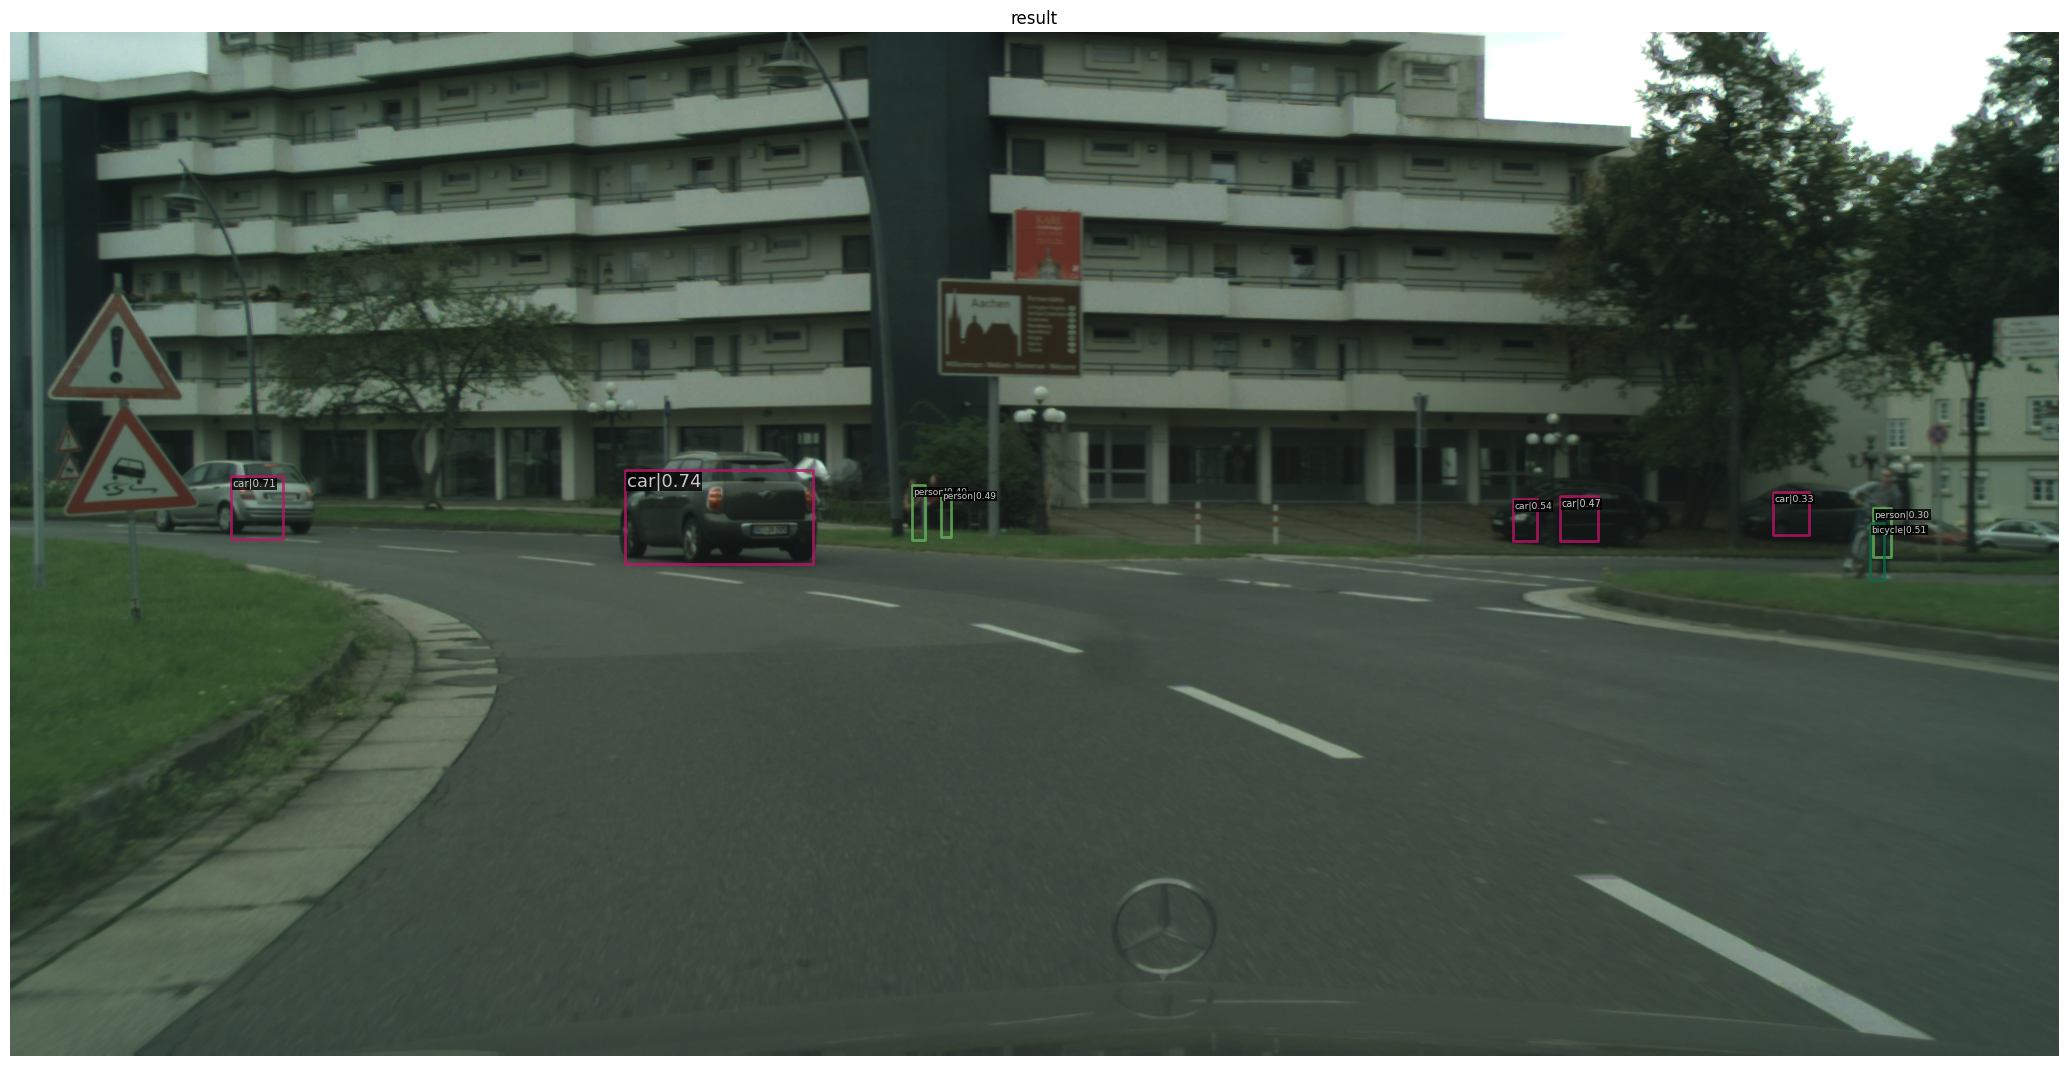

In [ ]:
# evaluate results on single image
model.cfg = config

model.eval()

img = 'demo/aachen_000000_000019_leftImg8bit.png'
result_from_trained = inference_detector(model, img)

show_result_pyplot(model, img, result_from_trained, score_thr=0.3)

In [ ]:
bbox_json_trained = convert_result_format(result_from_trained, [0,1,2,3,4,5,6,7])
coco_det_metric = COCODetection(ann_file = '/content/mmdetection/sample_ann_aachen.json', classwise = True )
coco_det_metric.add_predictions(bbox_json_trained)
coco_det_metric.compute()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Annotation file has 1 images
Annotation file has 12 labels
Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).


OrderedDict([('bbox_mAP', 0.03264115885272737),
             ('bbox_mAP_50', 0.061132429032376916),
             ('bbox_mAP_75', 0.04767143381004767),
             ('bbox_mAP_s', 0.0),
             ('bbox_mAP_m', 0.024263854956924256),
             ('bbox_mAP_l', 0.5999999999999999),
             ('bbox_person_precision', 0.0),
             ('bbox_bicycle_precision', 0.0),
             ('bbox_car_precision', 0.09792347655818212),
             ('bbox_motorcycle_precision', nan),
             ('bbox_airplane_precision', nan),
             ('bbox_bus_precision', nan),
             ('bbox_train_precision', nan),
             ('bbox_truck_precision', nan)])

# TO DO
- Edit train pipeline:
 - add early stopping based on loss
- Add testing pipeline:
 - input test set into dataloder (based on annotation file)
 - run dataloader in inference detector (or test.py) not sure which one
 - review multi image results and make sure they correspond to function convert_result_format
 - input those results to COCODetection object that calculates metrics


- Wrap finetuning and testing pipeline pipeline for running multiple experiments

# Results
- create scatter plot where (x,y) = (train city, test city) z = mAP